<a href="https://colab.research.google.com/github/talhaanwarch/Schizophrenia14/blob/master/schizophrenia_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In this approach data is segmented and feature are calculated for each segment. Then these features are averaged

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install wfdb
!pip install mne
# !pip install nitime
# !pip install nolds

     |████████████████████████████████| 122kB 6.0MB/s 
     |████████████████████████████████| 163kB 9.2MB/s 
     |████████████████████████████████| 6.6MB 7.9MB/s 


In [3]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-v2ydrilr
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-v2ydrilr
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=d2c1ac858324f203da9e7df44d6de5f1dd518bc3ba1940fa5d724cc10f52611a
  Stored in directory: /tmp/pip-ephem-wheel-cache-a56mwp0a/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-nefj3lne
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-nefj3lne
  Created wheel for entropy: filename=entropy-0.1.2-cp36-none-any.whl size=15609 sha256=b999301be5b67d5ef4d1aebdc9cacf1fe90d30cc256118de6d343365125c5358
  Stored in directory: /tmp/pip-ephem-wheel-cache-aawjpgfz/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


# Download data

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/dataset/SchizoPhrenia 14

/content/drive/My Drive/dataset/SchizoPhrenia 14


# Read data

In [6]:
import glob
import os
import mne
import re
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [7]:
from scipy import signal
nyq = 0.5 * 250
l=0.2
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')

In [8]:
HC_files=glob.glob('HC/*.edf')    
HC=[]
for i in HC_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    data=signal.filtfilt(b, a, data)
   # data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #scaler=StandardScaler()        
    #data=scaler.fit_transform(data.T)     
    #data=maxabs_scale(data.T)
    HC.append(data.T)

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/HC/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

In [9]:
SZ_files=glob.glob('SZ/*.edf')
SZ=[]
for i in SZ_files:
    data=mne.io.read_raw_edf(i,preload=True)
    #data.set_eeg_reference('average')
    data=data.get_data()
    data=signal.filtfilt(b, a, data)
    #data=mne.filter.filter_data(data, sfreq=250, l_freq=0.1, h_freq=45)
    #data=maxabs_scale(data.T)
    SZ.append(data.T)

Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/SchizoPhrenia 14/SZ/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Extracting EDF parameters from /content/drive/My Drive/dataset/S

In [10]:
len(HC),len(SZ)

(14, 14)

In [11]:
import numpy as np
X1=np.concatenate(HC)
X2=np.concatenate(SZ)
X=np.concatenate((X1,X2))
X.shape

(7215750, 19)

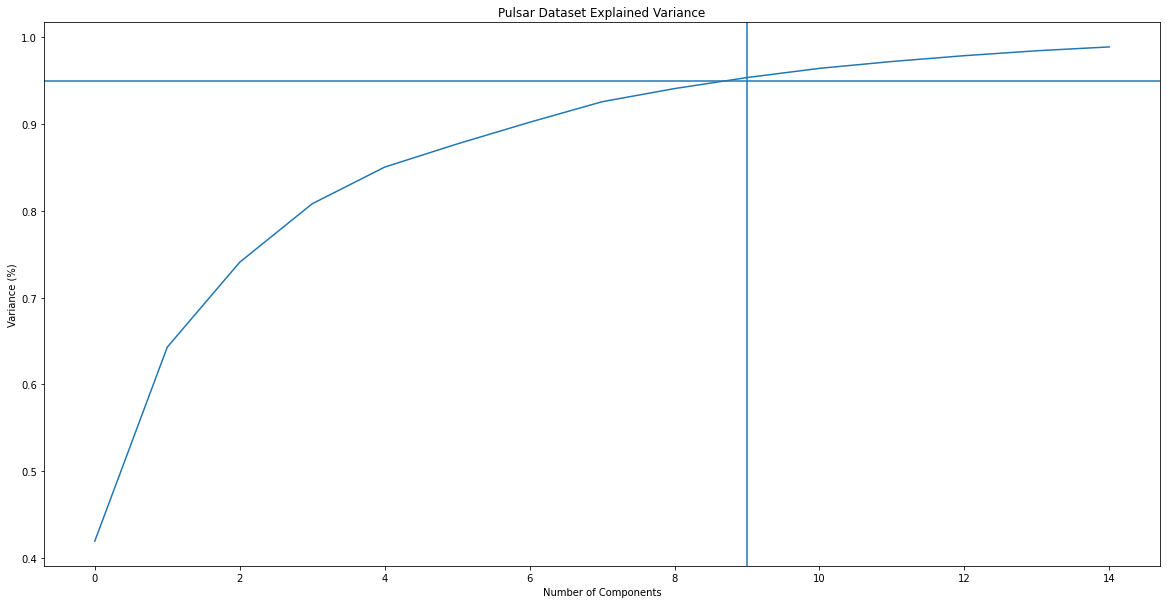

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
plt.figure(figsize=(20,10))
pca = PCA().fit(X)
plt.axhline(0.95)
plt.axvline(9)
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:15])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [13]:
channels=['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']

In [14]:
df1 = pd.DataFrame.from_records(X)
df1.shape

(7215750, 19)

In [15]:
df1.columns=channels

In [16]:
df1.head()

,Fp2,F8,T4,T6,O2,Fp1,F7,T3,T5,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,-0.000007,-0.000002,9.886327e-07,0.000004,0.000009,-0.000001,-0.000001,-2.629085e-07,-0.000004,-0.000005,0.000001,0.000001,0.000004,8.631432e-08,-2.890802e-07,-8.631787e-07,-3.687646e-07,0.000003,0.000002
1,-0.000007,-0.000002,1.096809e-06,0.000004,0.000009,-0.000001,-0.000001,-3.665014e-07,-0.000004,-0.000005,0.000001,0.000001,0.000004,6.061175e-08,-3.523460e-07,-9.415636e-07,-3.746824e-07,0.000003,0.000002
2,-0.000007,-0.000002,1.243103e-06,0.000004,0.000009,-0.000001,-0.000001,-4.442266e-07,-0.000004,-0.000005,0.000001,0.000001,0.000004,4.740307e-08,-4.121318e-07,-1.035766e-06,-3.704197e-07,0.000003,0.000002
3,-0.000007,-0.000002,1.295173e-06,0.000004,0.000009,-0.000001,-0.000001,-3.900367e-07,-0.000004,-0.000005,0.000001,0.000001,0.000004,7.848214e-08,-4.049569e-07,-1.071462e-06,-3.547038e-07,0.000003,0.000002
4,-0.000007,-0.000002,1.066742e-06,0.000004,0.000008,-0.000001,-0.000001,-1.230319e-07,-0.000004,-0.000005,0.000001,0.000001,0.000004,1.742731e-07,-2.675181e-07,-9.493647e-07,-3.415871e-07,0.000003,0.000002


In [17]:
ch=9

In [18]:
X_1=df1.var()
idx=X_1.sort_values()[-9::].index

print(idx)
ch=len(idx)

Index(['F8', 'Fz', 'F7', 'P4', 'Pz', 'Fp1', 'O2', 'Fp2', 'T5'], dtype='object')


In [19]:
indx=[]
for i in idx:
  indx.append(channels.index(i))
indx=np.array(indx)  

In [20]:
indx

array([ 1, 16,  6, 12, 18,  5,  4,  0,  8])

In [21]:
def reshape(data):   
    shape=data.ravel().shape[0]
    s=shape%19000
    if s!=0:
        d=data.ravel()[s//2:-s//2].reshape(-1,1000,19)[:,:,indx]
        #return np.swapaxes(d,1,2)   
        return d
    else: 
        d1=data.reshape(-1,1000,19)[:,:,indx]
        #return np.swapaxes(d1,1,2)   
        return d1
        

In [22]:
HC_reshaped=[]
for i in HC:
    HC_reshaped.append(reshape(i))
    
    
SZ_reshaped=[]
for i in SZ:
    SZ_reshaped.append(reshape(i))   

In [23]:
HC_reshaped[0].shape

(231, 1000, 9)

# Libraries

In [24]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
#from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#import nolds
np.warnings.filterwarnings('ignore')

# Main Features

In [25]:

from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)

def argminim(data):
      return np.argmin(data,axis=0)


def argmaxim(data):
      return np.argmax(data,axis=0)

def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


def lziv_complex(data):
    result=[]
    for i in data.T:
        result.append(lziv_complexity(i))
    return np.array(result)

        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),teager(data),lziv_complex(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [26]:
features1=[]
for f in HC_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))

In [27]:
features2=[]
for f in SZ_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [28]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)

y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))
X.shape,y.shape

((28, 234), (28,))

In [29]:
feature=X.copy()
label=y.copy()
from sklearn.preprocessing import scale,maxabs_scale
feature=scale(feature)

In [30]:

from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_


svc_param_selection(feature,label)

0.85

In [31]:
feature_list=['mean','std','ptp','var','minim','maxim','argmin','argmax','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','teager','lziv_complex',
'hjorth_mobility','hjorth_complexity']

In [32]:
feature_selected=[]
feat_non_sorted=[]
score_non_sorted=[]
for i ,j in zip(range(0,feature.shape[1],ch),feature_list):
  acc=svc_param_selection(feature[:,i:i+ch],label)
  print(j," : ",acc)
  feat_non_sorted.append(j)
  score_non_sorted.append(acc)

mean  :  0.6166666666666666
std  :  0.7833333333333333
ptp  :  0.7166666666666666
var  :  0.5833333333333333
minim  :  0.75
maxim  :  0.6833333333333333
argmin  :  0.6166666666666666
argmax  :  0.55
mean_square  :  0.5833333333333333
rms  :  0.7833333333333333
abs_diffs_signal  :  0.7833333333333333
skewness  :  0.5
kurtosis  :  0.7666666666666666
zero_crossing  :  0.7666666666666666
app_epy  :  0.7333333333333333
perm_epy  :  0.8
svd_epy  :  0.7666666666666666
spectral_epy  :  0.65
sample_epy  :  0.7666666666666666
katz  :  0.8666666666666666
higuchi  :  0.7
petrosian  :  0.8666666666666666
teager  :  0.7666666666666666
lziv_complex  :  0.36666666666666664
hjorth_mobility  :  0.8666666666666666
hjorth_complexity  :  0.7833333333333333


In [33]:
print(feat_non_sorted)
print(score_non_sorted)

['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argmin', 'argmax', 'mean_square', 'rms', 'abs_diffs_signal', 'skewness', 'kurtosis', 'zero_crossing', 'app_epy', 'perm_epy', 'svd_epy', 'spectral_epy', 'sample_epy', 'katz', 'higuchi', 'petrosian', 'teager', 'lziv_complex', 'hjorth_mobility', 'hjorth_complexity']
[0.6166666666666666, 0.7833333333333333, 0.7166666666666666, 0.5833333333333333, 0.75, 0.6833333333333333, 0.6166666666666666, 0.55, 0.5833333333333333, 0.7833333333333333, 0.7833333333333333, 0.5, 0.7666666666666666, 0.7666666666666666, 0.7333333333333333, 0.8, 0.7666666666666666, 0.65, 0.7666666666666666, 0.8666666666666666, 0.7, 0.8666666666666666, 0.7666666666666666, 0.36666666666666664, 0.8666666666666666, 0.7833333333333333]


In [34]:
score,feat  = zip(*sorted(zip(score_non_sorted, feat_non_sorted),reverse=True))


In [35]:
print(feat)
print(score)

('petrosian', 'katz', 'hjorth_mobility', 'perm_epy', 'std', 'rms', 'hjorth_complexity', 'abs_diffs_signal', 'zero_crossing', 'teager', 'svd_epy', 'sample_epy', 'kurtosis', 'minim', 'app_epy', 'ptp', 'higuchi', 'maxim', 'spectral_epy', 'mean', 'argmin', 'var', 'mean_square', 'argmax', 'skewness', 'lziv_complex')
(0.8666666666666666, 0.8666666666666666, 0.8666666666666666, 0.8, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666, 0.75, 0.7333333333333333, 0.7166666666666666, 0.7, 0.6833333333333333, 0.65, 0.6166666666666666, 0.6166666666666666, 0.5833333333333333, 0.5833333333333333, 0.55, 0.5, 0.36666666666666664)


In [36]:
def del_item(a, b):
     return [x for x in a if x not in b]



#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
acc=0
deleted_item=[]
for i in range(1,20):
  feature_selected=list(feat[:i])
  # feature_selected=del_item(feature_selected,deleted_item)

  X_good=[]
  for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
      for fe in feature_selected:
          if key==fe:     
              #print('key',key,'value',val,":",val+ch) 
              X_good.append(feature[:,val:val+ch])
  good_feature=np.concatenate((X_good),axis=1)
  #good_feature=np.concatenate((good_feature,non_eeg),1)


  acc_new=svc_param_selection(good_feature,label)
  print(i,' : ', acc_new)

  # print(acc_new, good_feature.shape)
  # if acc_new<(acc-0.01):
  #   deleted_item.append(feature_selected.pop())
  #   print('del item',deleted_item)
  # else:
  #   acc=acc_new


1  :  0.8666666666666666
2  :  0.8
3  :  0.7333333333333333
4  :  0.7
5  :  0.8166666666666667
6  :  0.7833333333333333
7  :  0.85
8  :  0.8166666666666667
9  :  0.8833333333333332
10  :  0.8833333333333332
11  :  0.85
12  :  0.85
13  :  0.8166666666666667
14  :  0.7833333333333333
15  :  0.7833333333333333
16  :  0.7833333333333333
17  :  0.75
18  :  0.7833333333333333
19  :  0.7833333333333333


In [47]:

feature_selected=feat[:10]
X_good=[]
for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
    for fe in feature_selected:
        if key==fe:     
            print('key',key,'value',val,":",val+ch) 
            X_good.append(feature[:,val:val+ch])

key std value 9 : 18
key rms value 81 : 90
key abs_diffs_signal value 90 : 99
key zero_crossing value 117 : 126
key perm_epy value 135 : 144
key katz value 171 : 180
key petrosian value 189 : 198
key teager value 198 : 207
key hjorth_mobility value 216 : 225
key hjorth_complexity value 225 : 234


In [48]:
good_feature=np.concatenate((X_good),axis=1)
good_feature.shape

(28, 90)

In [49]:
def svc_param_selection(X, y, nfolds):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,80,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


svc_param_selection(good_feature,label,10)

0.8833333333333332


{'C': 10, 'gamma': 0.008}

In [58]:
clf = SVC(kernel="rbf", C=10,gamma=0.008, probability=True)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.8833333333333332 0.23629078131263043
average precision :  0.9 0.2
average recall :  0.95 0.15
average f1 score :  0.9166666666666666 0.1707825127659933


In [51]:
def knn_param_selection(X, y, nfolds):
    n_neighbors  = [ 3,4,5,6,7,8,9]
    weights  = ['uniform','distance']
    metric=['minkowski','manhattan','euclidean']
    param_grid = {'n_neighbors': n_neighbors, 'weights' : weights,'metric':metric}
    grid_search =GridSearchCV( KNeighborsClassifier(), param_grid, cv=nfolds,n_jobs=-1)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


knn_param_selection(good_feature,label,10)

0.7666666666666666


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [59]:
clf = KNeighborsClassifier(metric= 'manhattan', n_neighbors=4, weights= 'distance')
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.7666666666666666 0.2603416558635552
average precision :  0.75 0.33541019662496846
average recall :  0.8 0.33166247903554
average f1 score :  0.75 0.30956959368344517


In [53]:

from sklearn.linear_model import LogisticRegression
def logistic_param_selection(X, y, nfolds):
    C= [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]
    max_it= [200,300,400,500]
    param_grid = {'C': C,'max_iter':max_it}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    print(grid_search.best_score_)
    return grid_search.best_params_


logistic_param_selection(good_feature,label,10)

0.75


{'C': 0.5, 'max_iter': 200}

In [60]:
clf = LogisticRegression(max_iter=200,C=0.5)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.75 0.22669117514559073
average precision :  0.75 0.33541019662496846
average recall :  0.75 0.33541019662496846
average f1 score :  0.7166666666666667 0.29860788111948194


In [55]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
def dtree_param_selection(X,y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'max_depth': np.arange(2, 20),'random_state':[10,20,30,40]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
    #fit model to data
    dtree_gscv.fit(X, y)
    print(dtree_gscv.best_score_)
    #print(dtree_gscv.best_estimator_)
    return dtree_gscv.best_params_

dtree_param_selection(good_feature,label)

0.9333333333333332


{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'random_state': 30}

In [62]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 'log2',random_state=30)
acc = cross_val_score(clf,good_feature,label,cv=10)
precision = cross_val_score(clf,good_feature,label,cv=10,scoring='precision')
recall = cross_val_score(clf,good_feature,label,cv=10,scoring='recall')
f1 = cross_val_score(clf,good_feature,label,cv=10,scoring='f1')

print('average accuracy : ',np.array(acc).mean(),np.std(np.array(acc)))
print('average precision : ',np.array(precision).mean(),np.std(np.array(precision)))
print('average recall : ',np.array(recall).mean(),np.std(np.array(recall)))
print('average f1 score : ',np.array(f1).mean(),np.std(np.array(f1)))

average accuracy :  0.9333333333333332 0.13333333333333336
average precision :  0.95 0.15
average recall :  0.95 0.15
average f1 score :  0.9333333333333332 0.13333333333333336
